# Conjugate Gradient


Conjugate Gradient (CG) is the most popular iterative method for solving large systems of linear equations. CG is very effective to solve system of equations in the form of

$$
Ax = b
$$

where $x$ is the solution vector, $b$ is a known vector, and $A$ is a known, square, symmetric, positive-definite (or positive-indefinite) matrix. These systems arise in many important settings, such as finite difference and finite element methods for solving partial differential equations, structural analysis, and circuit analysis.

For a detailed explanation of how CG works and the theory behind CG, please refr to this great source: 
An Introduction to the Conjugate Gradient Method Without the Agonizing Pain - 
Jonathan Richard Shewchuk

Link: https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf

In [70]:
# Algorithm - Conjugate Gradient
import numpy as np

def conjugate_gradient(A,b):
    n = A.shape[0]
    x = np.zeros(n)
    r = b
    p = r
    r_old = r
    for k in range(n):
        v = A.dot(p)
        a = (r.T).dot(r)/((p.T).dot(v))
        x = x + a*p
        r = r - a*(v)
        betta = (r.T).dot(r)/((r_old.T).dot(r_old))
        p = r + betta*p
        r_old = r
    
    return x
    
        

<h3 style="color: red">Example 1:</h3> <strong>Solve the system of linear equations given below</strong>

In [88]:
A = np.array([[1, -1, 0], [-1, 2, 1], [0, 1, 2]])
b = np.array([0,2,3])
x = conjugate_gradient(A,b)
print("Matrix A = \n")
print(A)
print("\n Vector b = \n")
print(b)
print("\n The solution vector is x = \n")
print(x)
print("\n Verifying the solution Ax = b \n")
print(A.dot(x))

Matrix A = 

[[ 1 -1  0]
 [-1  2  1]
 [ 0  1  2]]

 Vector b = 

[0 2 3]

 The solution vector is x = 

[1. 1. 1.]

 Verifying the solution Ax = b 

[-0.  2.  3.]


<h3 style="color: red">Example 3</h3><strong>Let A be the $100 x 100$ tridiagonal symmetric matrix with $1, 2, ... ,100$ on the diagonal and 1 on the sub- and superdiagonals, and set $b = [1,1,1, ... , 1]$. Write a program that takes 100 steps of the CG iteration to approximately solve $Ax = b$. Additionally, produce a plot with two curves on it: the computed residual norms for CG, and the actual residual norm for CG</strong>

In [111]:
n = 100
A2 = np.zeros((n,n))
b2 = np.ones((n,1))
for k in range(n):
    A2[k,k] = k+1
    if k < n-1:
        A2[k+1]
A2 = A2 + np.diag(np.ones(n-1), -1) + np.diag(np.ones(n-1), 1)


In [126]:
import matplotlib.pyplot as plt
def conjugate_gradient_with_norm_plot(A,b):
    n = A.shape[0]
    x = np.zeros(n)
    r = b
    p = r
    r_old = r
    for k in range(n):
        v = A.dot(p)
        res = np.linalg.norm(b-A.dot(x),2)
        r_norm = np.linalg.norm(r,2)
        a = (r.T).dot(r)/((p.T).dot(v))
        x = x + a*p
        r = r - a*(v)
        betta = (r.T).dot(r)/((r_old.T).dot(r_old))
        p = r + betta*p
        r_old = r
        plt.plot(k+1, res,'k*-')
        plt.plot(k+1,r_norm,'bo-')
    return x


 The Solution x = 

[[ 1.45084374  1.45084374  1.45084374 ...  1.45084374  1.45084374
   1.45084374]
 [-0.45084374 -0.45084374 -0.45084374 ... -0.45084374 -0.45084374
  -0.45084374]
 [ 0.45084374  0.45084374  0.45084374 ...  0.45084374  0.45084374
   0.45084374]
 ...
 [ 0.00999999  0.00999999  0.00999999 ...  0.00999999  0.00999999
   0.00999999]
 [ 0.00989999  0.00989999  0.00989999 ...  0.00989999  0.00989999
   0.00989999]
 [ 0.009901    0.009901    0.009901   ...  0.009901    0.009901
   0.009901  ]]

 Verifying Ax = b 

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


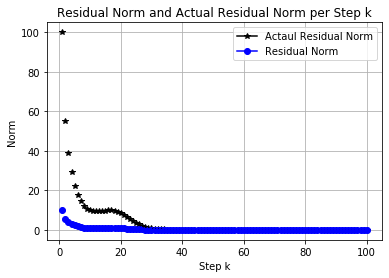

In [129]:
x = conjugate_gradient_with_norm_plot(A2,b2) 
print("\n The Solution x = \n")
print(x)
print("\n Verifying Ax = b \n")
print(A2@x)

plt.title('Residual Norm and Actual Residual Norm per Step k')
plt.xlabel('Step k')
plt.ylabel('Norm')
plt.grid(True)
plt.legend(['Actaul Residual Norm','Residual Norm'])